In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


The dataset below contains all the possible board configurations for a Tic Tac Toe game (https://archive.ics.uci.edu/dataset/101/tic+tac+toe+endgame). 

It is assumed that x is always the first to play. The dataset has the following structure
1) top-left case (values: 'x', 'o', 'b'),
2) top-middle case (values: 'x', 'o', 'b'),
3) top-right case (values: 'x', 'o', 'b'),ù
4) middle-left case (values: 'x', 'o', 'b'),
5) middle-middle case (values: 'x', 'o', 'b'),
6) middle-right case (values: 'x', 'o', 'b'),
7) bottom-left case (values: 'x', 'o', 'b'),
8) bottom-middle case (values: 'x', 'o', 'b'),
9) bottom-right case (values: 'x', 'o', 'b'),
10) Class ('positive': x wins, 'negative': x does not win).

The dataset has 10 columns and 958 rows. No missing values. The positive class is around twice the size of the negative class.

In [2]:
columns = ['top-left',
    'top-middle',
    'top-right',
    'middle-left',
    'middle-middle',
    'middle-right',
    'bottom-left',
    'bottom-middle',
    'bottom-right',
   'Class']
data = pd.read_csv('tic-tac-toe.csv', sep=',', names=columns)
display(data.head())
data.info()
data['Class'].value_counts()

,top-left,top-middle,top-right,middle-left,middle-middle,middle-right,bottom-left,bottom-middle,bottom-right,Class
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   top-left       958 non-null    object
 1   top-middle     958 non-null    object
 2   top-right      958 non-null    object
 3   middle-left    958 non-null    object
 4   middle-middle  958 non-null    object
 5   middle-right   958 non-null    object
 6   bottom-left    958 non-null    object
 7   bottom-middle  958 non-null    object
 8   bottom-right   958 non-null    object
 9   Class          958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


Class
positive    626
negative    332
Name: count, dtype: int64

We start visualising the dataset.
Below we illustrate the distribution of 'x', 'o', 'b' (blank) in each board position. In blue we show the positive outcome (x wins), in orange the negative outcomes (x does not win). 
We see that the highest number of winning 'x' (around 350) occurs the middle-middle case. The corner positions (top-left and top-right, bottom-left and bottom-right) show also a high count of winning 'x' (around 300). 
In contrast, middle-left and middle-right position present similar numbers of winning 'x' and 'o' (around 200) and also similar values of blank values associtation with wins.

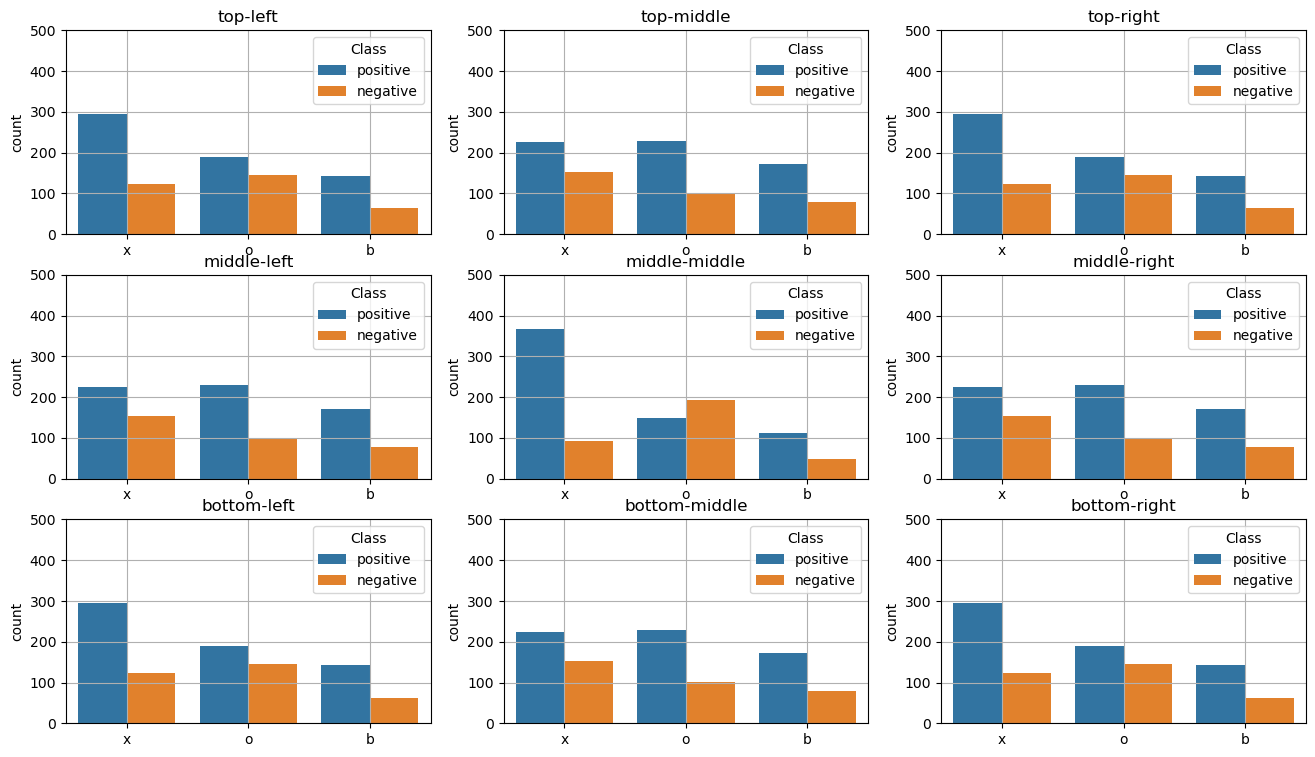

In [3]:
nrows = 3
ncol  = 3
fig, axes = plt.subplots(nrows, ncol, figsize=(16,3*nrows))

axes = axes.flatten()
for i, columns in enumerate(data.columns[:9]):
    sns.countplot(x=data[columns], ax=axes[i], order=['x', 'o', 'b'], hue=data['Class'])
    axes[i].set_title(columns)
    axes[i].set_xlabel("")
    axes[i].set_ylim(0,500)
    axes[i].grid()

We now visualise heatmaps of pairwise relationships on the board.
For each case of the Tic Tac Toe grid, we create heatmaps comparing that case with the remaining positions that follow in order (from top-left to bottom-right), avoiding symmetric plots and self-pairings. 
Each heatmap presents two columns: one for the positive outcome and one for the negative outcome. Each heatmap cell counts how often a specific symbol pair appears in winning or losing outcomes.
The heatmaps use a blue color gradient where darker shades represent more frequent combinations. 

These plots suggest some patterns that are more frequent in case of victory: for instance top-left middle-middle and top-right middle-middle suggest that the diagonal is a good winning pattern. Similar considerations hold for for the central vertical line (top-middle middle-middle and middle-middle bottom-middle).

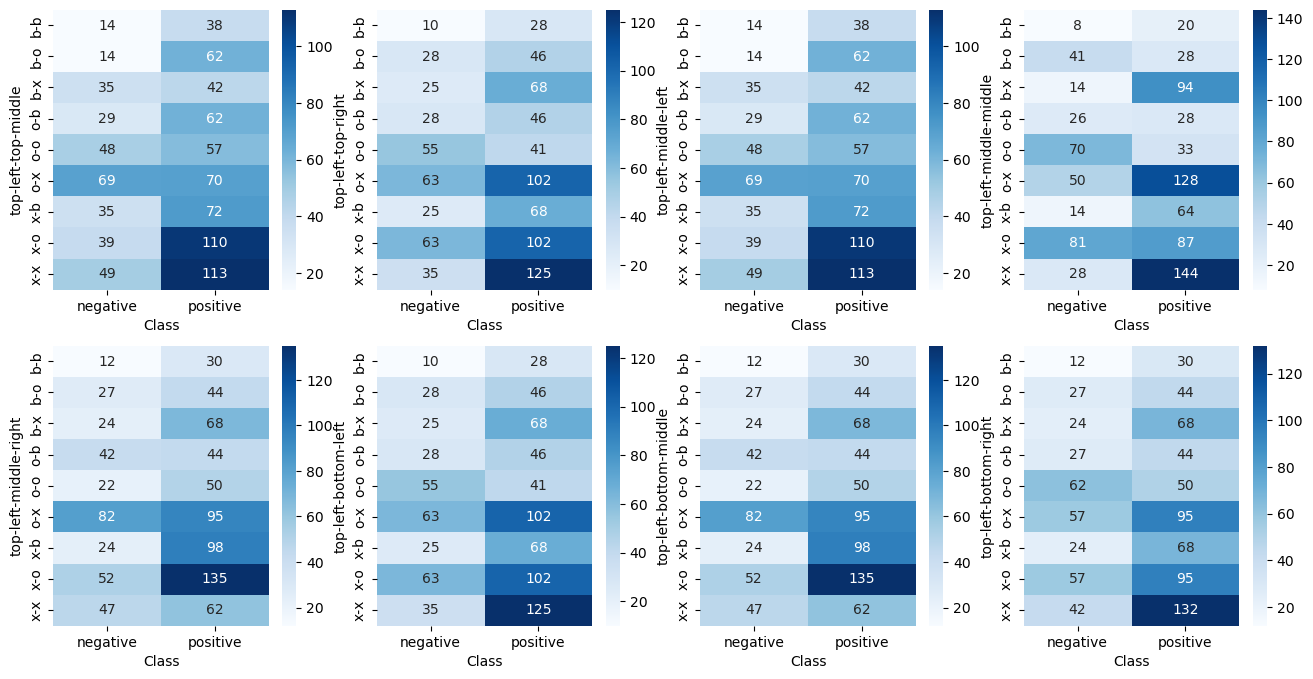

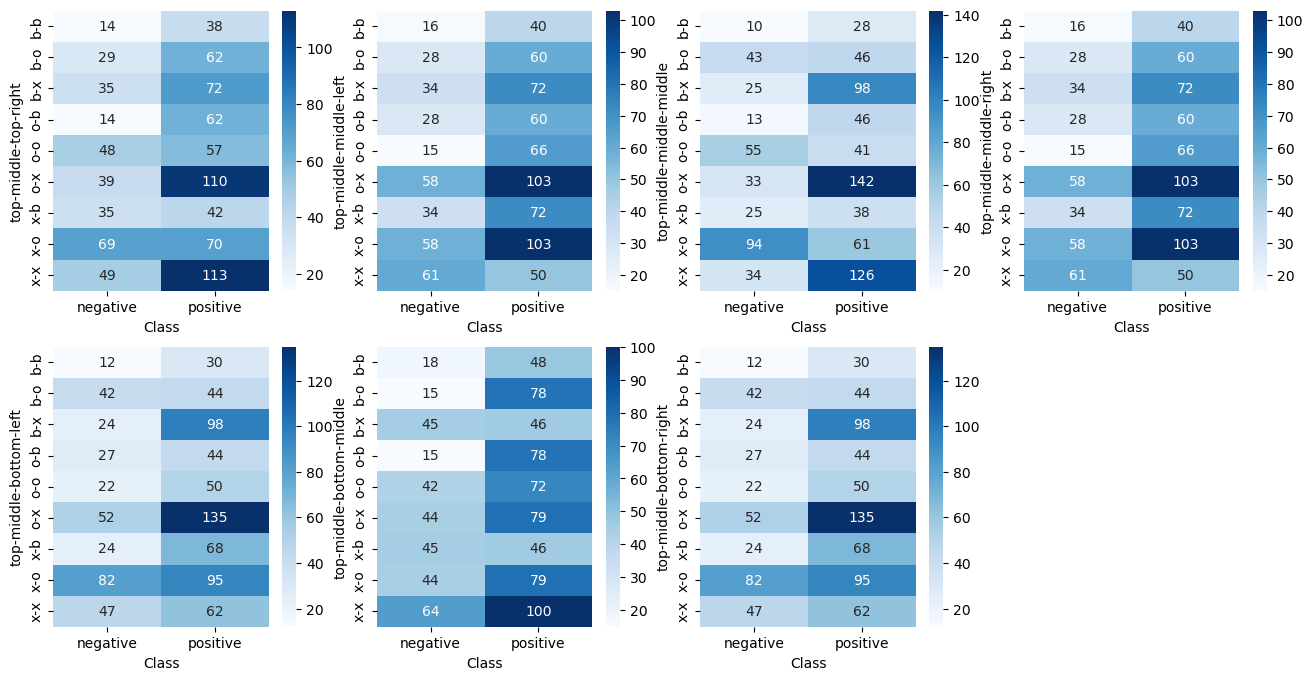

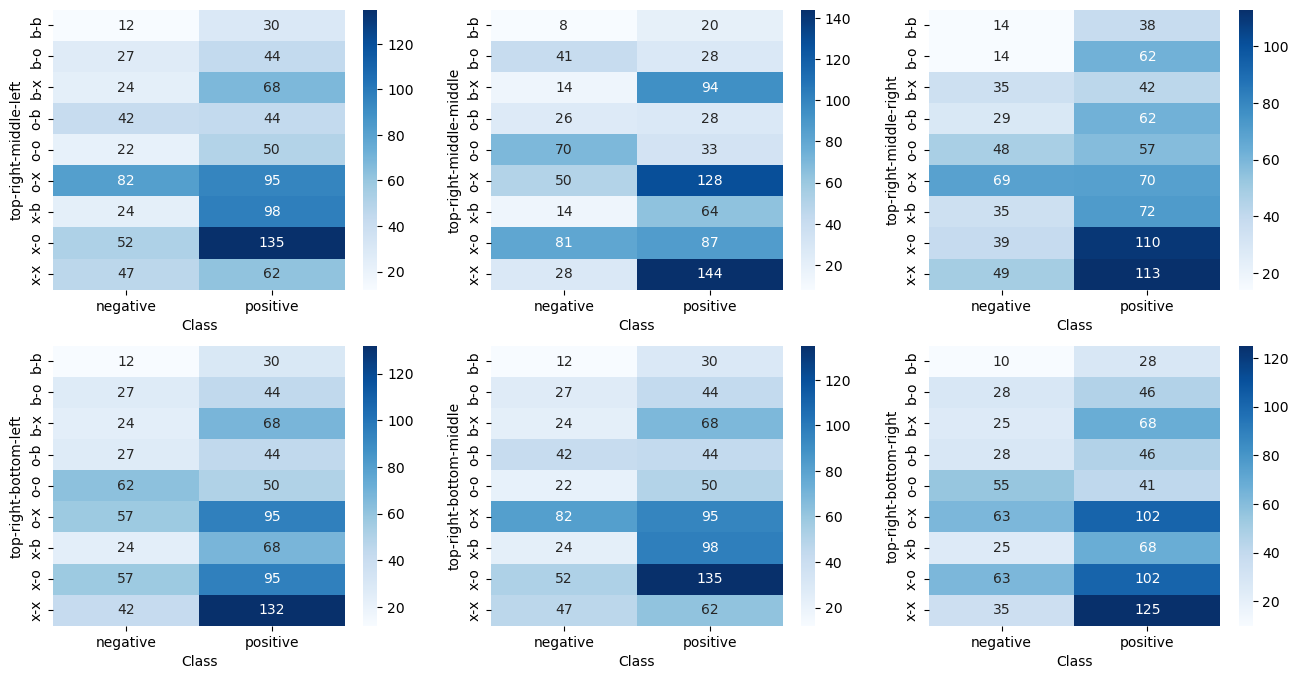

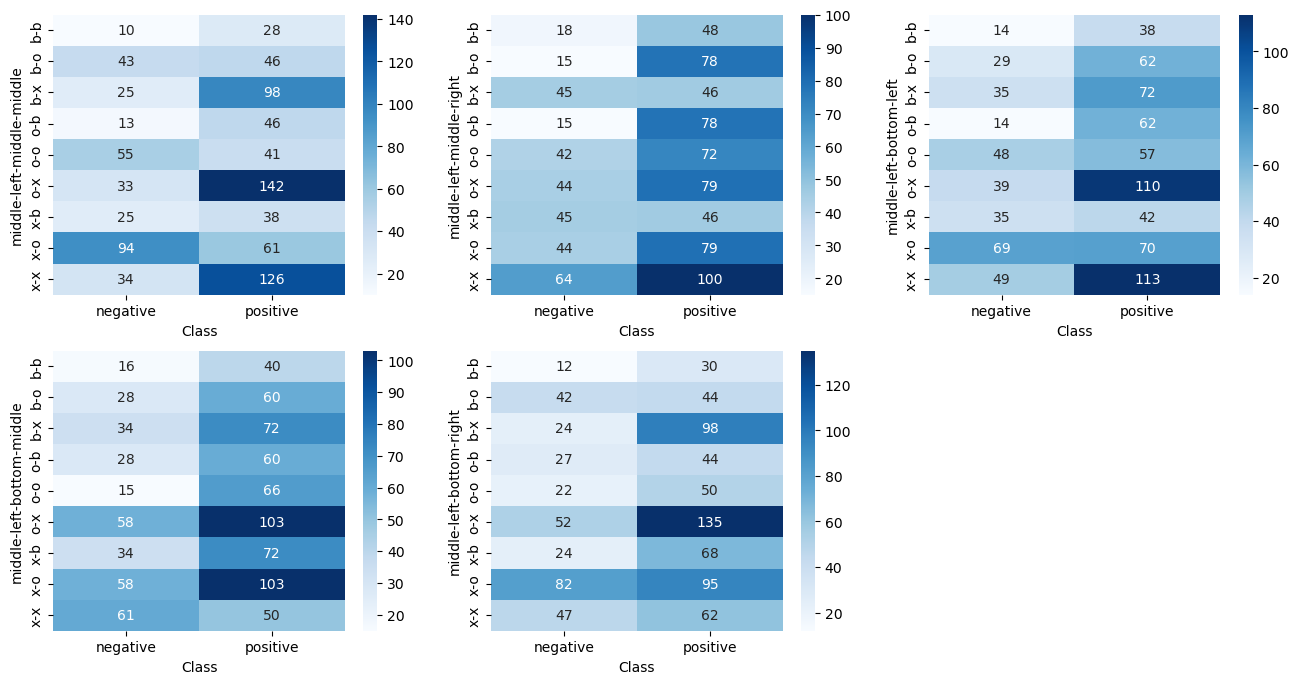

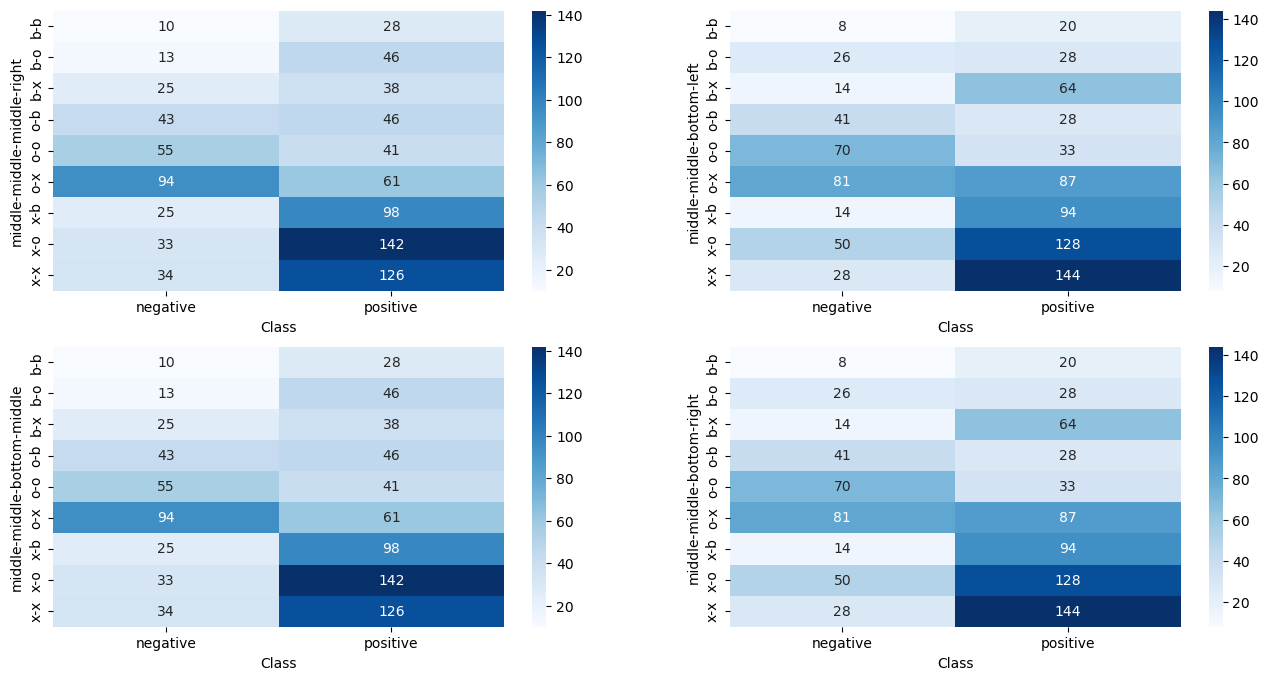

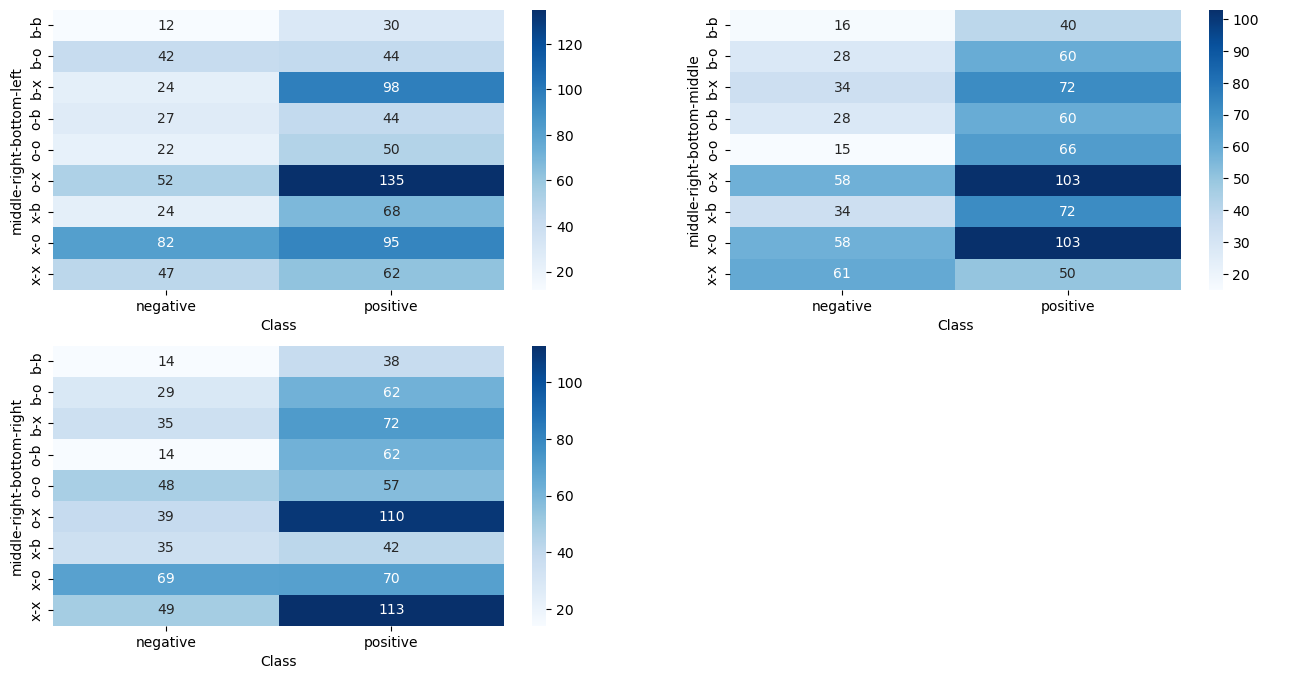

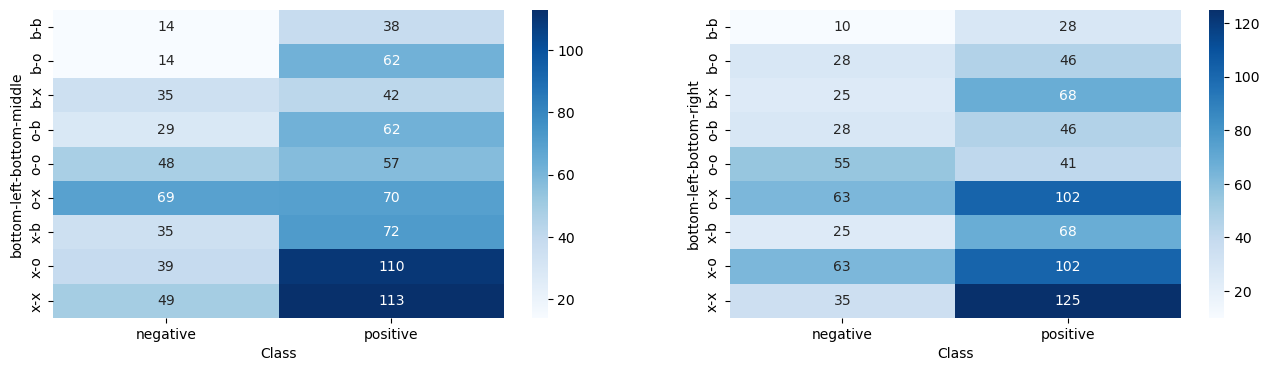

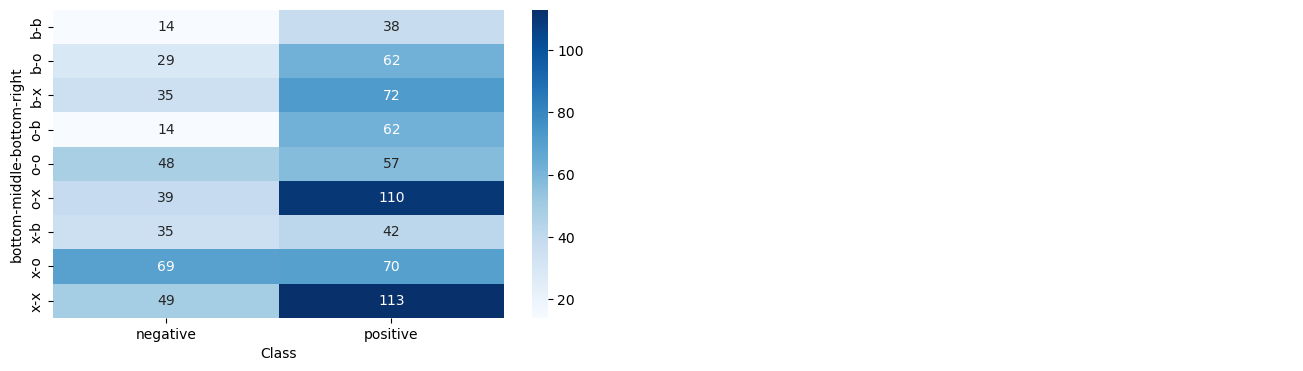

In [4]:
data_col0 = data.drop(columns=['top-left','Class'])
data_col1 = data.drop(columns=['top-left','top-middle','Class'])
data_col2 = data.drop(columns=['top-left','top-middle','top-right','Class'])
data_col3 = data.drop(columns=['top-left','top-middle','top-right','middle-left','Class'])
data_col4 = data.drop(columns=['top-left','top-middle','top-right','middle-left','middle-middle','Class'])
data_col5 = data.drop(columns=['top-left','top-middle','top-right','middle-left','middle-middle',
                               'middle-right','Class'])
data_col6 = data.drop(columns=['top-left','top-middle','top-right','middle-left','middle-middle',
                               'middle-right','bottom-left','Class'])
data_col7 = data.drop(columns=['top-left','top-middle','top-right','middle-left','middle-middle',
                               'middle-right','bottom-left','bottom-middle','Class'])
data_col8 = data.drop(columns=['top-left','top-middle','top-right','middle-left','middle-middle',
                               'middle-middle','bottom-left','bottom-middle','bottom-right','Class'])


def plot_pair_heatmap(data_to_plot, init_col, nrows, ncol):
    fig, axes = plt.subplots(nrows, ncol, figsize=(16,4*nrows))
    axes = axes.flatten()
    for i, columns in enumerate(data_to_plot.columns):
        table = pd.crosstab([init_col, data_col0[columns]], data['Class'])
        sns.heatmap(table, ax=axes[i], annot=True, fmt="d", cmap="Blues")
    for j in range(i+1, len(axes)):
        axes[j].axis('off')
    plt.show()  

plot_pair_heatmap(data_col0, data.iloc[:,0],2,4)
plot_pair_heatmap(data_col1, data.iloc[:,1],2,4)
plot_pair_heatmap(data_col2, data.iloc[:,2],2,3)
plot_pair_heatmap(data_col3, data.iloc[:,3],2,3)
plot_pair_heatmap(data_col4, data.iloc[:,4],2,2)
plot_pair_heatmap(data_col5, data.iloc[:,5],2,2)
plot_pair_heatmap(data_col6, data.iloc[:,6],1,2)
plot_pair_heatmap(data_col7, data.iloc[:,7],1,2)


We now build a ML model that, given a board configuration, informs us if 'x' has won or lost the game.
This is a classification problem, and we select two different alogrithms: logisitc regression and random forest. We evaluate their perfromance with the accuracy metric. Yet, considering that the two classes are imbalanced (since one twice the size of the other), we also use the classification report, which contains the information on precision, recall and F1-score.

We see that RandomForestClassifier operates much better, with an accuracy of around 96%.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report 

data_enc = data.replace({'o': 0, 'x': 1, 'b': 2})
X = data_enc.drop(columns=['Class'])
y = data_enc['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)

print('Accuracy LR', accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

from sklearn.ensemble import RandomForestClassifier
rf    = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Accuracy RF', accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

/var/folders/zw/ldmghmh904798r19t62pmdl40000gn/T/ipykernel_92498/408696662.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_enc = data.replace({'o': 0, 'x': 1, 'b': 2})


Accuracy LR 0.7361111111111112

Classification Report:
               precision    recall  f1-score   support

    negative       0.64      0.45      0.53        95
    positive       0.76      0.88      0.82       193

    accuracy                           0.74       288
   macro avg       0.70      0.66      0.67       288
weighted avg       0.72      0.74      0.72       288

Accuracy RF 0.9652777777777778

Classification Report:
               precision    recall  f1-score   support

    negative       0.96      0.94      0.95        95
    positive       0.97      0.98      0.97       193

    accuracy                           0.97       288
   macro avg       0.96      0.96      0.96       288
weighted avg       0.97      0.97      0.97       288

